# Face Detection_CV

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import and read ‘images.npy’.

In [2]:
Images= np.load('images.npy',  allow_pickle=True)

In [3]:
Images

array([[array([[[42, 37, 34],
                [56, 51, 48],
                [71, 66, 63],
                ...,
                [23, 33, 34],
                [26, 36, 37],
                [28, 38, 39]],

               [[40, 35, 32],
                [51, 46, 43],
                [64, 59, 56],
                ...,
                [27, 36, 35],
                [24, 33, 32],
                [26, 35, 34]],

               [[43, 38, 35],
                [51, 46, 43],
                [61, 56, 53],
                ...,
                [28, 30, 27],
                [33, 35, 32],
                [35, 37, 34]],

               ...,

               [[56, 47, 40],
                [57, 48, 41],
                [61, 52, 45],
                ...,
                [67, 48, 42],
                [55, 35, 28],
                [60, 40, 33]],

               [[53, 44, 37],
                [54, 45, 38],
                [57, 48, 41],
                ...,
                [59, 40, 34],
                [60, 40, 3

Split the data into Features(X) & labels(Y). Unify shape of all the images.

In [4]:
Images.shape

(409, 2)

In [5]:
X=Images[:,0] #first column as X features

In [6]:
X

array([array([[[42, 37, 34],
               [56, 51, 48],
               [71, 66, 63],
               ...,
               [23, 33, 34],
               [26, 36, 37],
               [28, 38, 39]],

              [[40, 35, 32],
               [51, 46, 43],
               [64, 59, 56],
               ...,
               [27, 36, 35],
               [24, 33, 32],
               [26, 35, 34]],

              [[43, 38, 35],
               [51, 46, 43],
               [61, 56, 53],
               ...,
               [28, 30, 27],
               [33, 35, 32],
               [35, 37, 34]],

              ...,

              [[56, 47, 40],
               [57, 48, 41],
               [61, 52, 45],
               ...,
               [67, 48, 42],
               [55, 35, 28],
               [60, 40, 33]],

              [[53, 44, 37],
               [54, 45, 38],
               [57, 48, 41],
               ...,
               [59, 40, 34],
               [60, 40, 33],
               [54, 34, 27]],



In [7]:
Y=Images[:,1]

In [8]:
Y

array([list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063}, {'x': 0.1723076923076923, 'y': 0.45345345345345345}], 'imageWidth': 650, 'imageHeight': 333}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913}, {'x': 0.6584615384615384, 'y': 0.46846846846846846}], 'imageWidth': 650, 'imageHeight': 333}]),
       list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527}, {'x': 0.7692307692307693, 'y': 0.36182902584493043}], 'imageWidth': 1280, 'imageHeight': 697}]),
       list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.46956521739130436, 'y': 0.05}, {'x': 0.6065217391304348, 'y': 0.3333333333333333}], 'imageWidth': 460, 'imageHeight': 240}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.6282608695652174, 'y': 0.008333333333333333}, {'x': 0.7456521739130435, 'y': 0.30833333333333335}], 'imageWidth': 460, 'imageHeight': 240}]),
       list([{'

In [10]:
X.shape

(409,)

In [11]:
#Viewing image with label
x=Images[0][0]
y=Images[0][1]

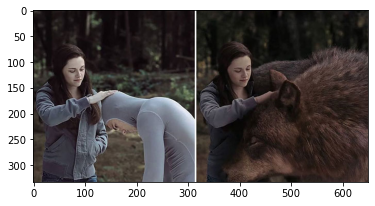

In [12]:
plt.imshow(x);

In [13]:
y=np.array(y)

In [14]:
display(Y[0])

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}],
  'imageWidth': 650,
  'imageHeight': 333},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}],
  'imageWidth': 650,
  'imageHeight': 333}]

In [15]:
y.shape

(2,)

In [16]:
Width = 224
Height = 224
Alpha = 1 #Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower

In [17]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

Y = np.zeros((int(Images.shape[0]), Height, Width))
X = np.zeros((int(Images.shape[0]), Height, Width, 3))
for index in range(Images.shape[0]):
    img = Images[index][0]
    img = cv2.resize(img, dsize=(Height, Width), interpolation=cv2.INTER_CUBIC)
    try:
        img = img[:,:,:3]
    except:
        continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in Images[index][1]:
        x1 = int(i["points"][0]['x'] * Width)
        x2 = int(i["points"][1]['x'] * Width)
        y1 = int(i["points"][0]['y'] * Height)
        y2 = int(i["points"][1]['y'] * Height)
        Y[index][y1:y2, x1:x2] = 1

In [18]:
X.shape

(409, 224, 224, 3)

In [19]:
Y.shape

(409, 224, 224)

Split the data into train and test[400:9].

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=9, random_state=42)

In [21]:
X_train.shape

(400, 224, 224, 3)

In [22]:
X_test.shape

(9, 224, 224, 3)

In [23]:
y_train.shape, y_test.shape

((400, 224, 224), (9, 224, 224))

pick random image from the train data and display original image and masked image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.28627449 -0.34117645 -0.77254903]
  [-0.29411763 -0.34901959 -0.78039217]
  [-0.30196077 -0.35686272 -0.78823531]
  ...
  [-0.41176468 -0.48235291 -0.83529413]
  [-0.41176468 -0.48235291 -0.84313726]
  [-0.40392154 -0.49019605 -0.85882354]]

 [[-0.24705881 -0.30196077 -0.73333335]
  [-0.27843136 -0.33333331 -0.7647059 ]
  [-0.26274508 -0.31764704 -0.74901962]
  ...
  [-0.43529409 -0.49803919 -0.85882354]
  [-0.44313723 -0.51372552 -0.88235295]
  [-0.42745095 -0.50588238 -0.89019608]]

 [[-0.27843136 -0.33333331 -0.7647059 ]
  [-0.25490195 -0.3098039  -0.74117649]
  [-0.20784312 -0.26274508 -0.7019608 ]
  ...
  [-0.45098037 -0.51372552 -0.87450981]
  [-0.45098037 -0.52156866 -0.89803922]
  [-0.44313723 -0.52156866 -0.9137255 ]]

 ...

 [[-0.09019607 -0.12156862 -0.69411767]
  [-0.09803921 -0.12941176 -0.7019608 ]
  [-0.13725489 -0.16862744 -0.74117649]
  ...
  [-0.74117649 -0.78823531 -0.89019608]
  [-0.72549021 -0.77254903 -0.86666667]
  [-0.74901962 -0.79607844 -0.89803922]]

 [

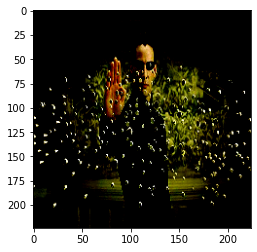

In [24]:
from matplotlib import pyplot
n = 100
print(X_train[n])
pyplot.imshow(X_train[n]);

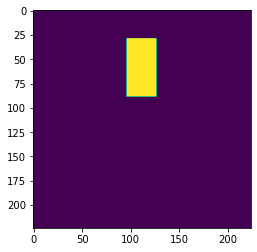

In [25]:
pyplot.imshow(y_train[n])

Model building

Design a face mask detection model.

In [26]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model
import tensorflow as tf

HEIGHT_CELLS = 28
WIDTH_CELLS = 28
BATCH_SIZE = 1

In [27]:
model = MobileNet(input_shape=(Height, Width, 3), include_top=False, alpha=Alpha, weights="imagenet")
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [28]:
def create_model(trainable=False):
    model = MobileNet(input_shape=(Height, Width, 3), include_top=False, alpha=Alpha, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
        
    block00 = model.layers[0].input
    block01 = model.get_layer("conv_pw_1_relu").output
    block03 = model.get_layer("conv_pw_3_relu").output
    block05 = model.get_layer("conv_pw_5_relu").output
    block09 = model.get_layer("conv_pw_9_relu").output
    block13 = model.get_layer("conv_pw_13_relu").output

    decoderBlock = Concatenate()([UpSampling2D()(block13), block09])
    decoderBlock = Concatenate()([UpSampling2D()(decoderBlock), block05])
    decoderBlock = Concatenate()([UpSampling2D()(decoderBlock), block03])
    decoderBlock = Concatenate()([UpSampling2D()(decoderBlock), block01])
    decoderBlock = Concatenate()([UpSampling2D()(decoderBlock), block00])

    decoderBlock = Conv2D(1, kernel_size=1, activation="sigmoid")(decoderBlock)
    decoderBlock = Reshape((Height, Width))(decoderBlock)

    return Model(inputs=model.input, outputs=decoderBlock) 

In [29]:
model = create_model()
# Print summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                             

 on)                                                                                              
                                                                                                  
 conv_dw_5_relu (ReLU)          (None, 28, 28, 256)  0           ['conv_dw_5_bn[0][0]']           
                                                                                                  
 conv_pw_5 (Conv2D)             (None, 28, 28, 256)  65536       ['conv_dw_5_relu[0][0]']         
                                                                                                  
 conv_pw_5_bn (BatchNormalizati  (None, 28, 28, 256)  1024       ['conv_pw_5[0][0]']              
 on)                                                                                              
                                                                                                  
 conv_pw_5_relu (ReLU)          (None, 28, 28, 256)  0           ['conv_pw_5_bn[0][0]']           
          

 conv_dw_11 (DepthwiseConv2D)   (None, 14, 14, 512)  4608        ['conv_pw_10_relu[0][0]']        
                                                                                                  
 conv_dw_11_bn (BatchNormalizat  (None, 14, 14, 512)  2048       ['conv_dw_11[0][0]']             
 ion)                                                                                             
                                                                                                  
 conv_dw_11_relu (ReLU)         (None, 14, 14, 512)  0           ['conv_dw_11_bn[0][0]']          
                                                                                                  
 conv_pw_11 (Conv2D)            (None, 14, 14, 512)  262144      ['conv_dw_11_relu[0][0]']        
                                                                                                  
 conv_pw_11_bn (BatchNormalizat  (None, 14, 14, 512)  2048       ['conv_pw_11[0][0]']             
 ion)     

Design Dice Coefficient and Loss function.

In [30]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

In [31]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=1, min_lr=1e-6, verbose=1, mode="min")

Train and tune the model as required. 

In [33]:
model = create_model(False)
optimizer = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(loss=loss, optimizer = optimizer, metrics=[dice_coefficient])

In [34]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs = 5,verbose=1,batch_size=5)

Epoch 1/5
80/80 [==============================] - 287s 3s/step - loss: 2.3637 - dice_coefficient: 0.1932 - val_loss: 1.9220 - val_dice_coefficient: 0.2525
Epoch 2/5
80/80 [==============================] - 264s 3s/step - loss: 1.6313 - dice_coefficient: 0.3027 - val_loss: 1.4167 - val_dice_coefficient: 0.3593
Epoch 3/5
80/80 [==============================] - 272s 3s/step - loss: 1.2918 - dice_coefficient: 0.3874 - val_loss: 1.1814 - val_dice_coefficient: 0.4258
Epoch 4/5
80/80 [==============================] - 294s 4s/step - loss: 1.1078 - dice_coefficient: 0.4471 - val_loss: 1.0562 - val_dice_coefficient: 0.4663
Epoch 5/5
80/80 [==============================] - 329s 4s/step - loss: 1.0286 - dice_coefficient: 0.4771 - val_loss: 0.9788 - val_dice_coefficient: 0.4910


In [33]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [34]:
model2 = create_model()
model2.summary()
optimizer2 = tf.keras.optimizers.Adam(lr=1e-4,beta_1=0.9, beta_2=0.999, epsilon=None)
model2.compile(loss=loss, optimizer = optimizer2, metrics=[dice_coefficient])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                           

 on)                                                                                              
                                                                                                  
 conv_dw_5_relu (ReLU)          (None, 28, 28, 256)  0           ['conv_dw_5_bn[0][0]']           
                                                                                                  
 conv_pw_5 (Conv2D)             (None, 28, 28, 256)  65536       ['conv_dw_5_relu[0][0]']         
                                                                                                  
 conv_pw_5_bn (BatchNormalizati  (None, 28, 28, 256)  1024       ['conv_pw_5[0][0]']              
 on)                                                                                              
                                                                                                  
 conv_pw_5_relu (ReLU)          (None, 28, 28, 256)  0           ['conv_pw_5_bn[0][0]']           
          

 conv_dw_11 (DepthwiseConv2D)   (None, 14, 14, 512)  4608        ['conv_pw_10_relu[0][0]']        
                                                                                                  
 conv_dw_11_bn (BatchNormalizat  (None, 14, 14, 512)  2048       ['conv_dw_11[0][0]']             
 ion)                                                                                             
                                                                                                  
 conv_dw_11_relu (ReLU)         (None, 14, 14, 512)  0           ['conv_dw_11_bn[0][0]']          
                                                                                                  
 conv_pw_11 (Conv2D)            (None, 14, 14, 512)  262144      ['conv_dw_11_relu[0][0]']        
                                                                                                  
 conv_pw_11_bn (BatchNormalizat  (None, 14, 14, 512)  2048       ['conv_pw_11[0][0]']             
 ion)     

In [35]:
model2.fit(X_train, y_train, validation_data=(X_test, y_test),epochs = 15,verbose=1,batch_size=5,callbacks=[checkpoint,reduce_lr,stop])

Epoch 1/15

Epoch 1: loss improved from inf to 2.01484, saving model to model-2.01.h5
 1/80 [..............................] - ETA: 18:19 - loss: 2.0148 - dice_coefficient: 0.2292
Epoch 1: loss did not improve from 2.01484
 2/80 [..............................] - ETA: 4:49 - loss: 2.2162 - dice_coefficient: 0.1955 
Epoch 1: loss did not improve from 2.01484
 3/80 [>.............................] - ETA: 4:22 - loss: 2.0342 - dice_coefficient: 0.2379
Epoch 1: loss did not improve from 2.01484
 4/80 [>.............................] - ETA: 4:12 - loss: 2.1599 - dice_coefficient: 0.2117
Epoch 1: loss did not improve from 2.01484
 5/80 [>.............................] - ETA: 4:09 - loss: 2.2183 - dice_coefficient: 0.2029
Epoch 1: loss did not improve from 2.01484
 6/80 [=>............................] - ETA: 4:02 - loss: 2.2147 - dice_coefficient: 0.2020
Epoch 1: loss did not improve from 2.01484
 7/80 [=>............................] - ETA: 3:56 - loss: 2.1657 - dice_coefficient: 0.2073
Epo

32/80 [===========>..................] - ETA: 2:56 - loss: 1.5514 - dice_coefficient: 0.3190
Epoch 2: loss improved from 1.55135 to 1.54669, saving model to model-1.55.h5
33/80 [===========>..................] - ETA: 2:54 - loss: 1.5467 - dice_coefficient: 0.3208
Epoch 2: loss improved from 1.54669 to 1.54583, saving model to model-1.55.h5
34/80 [===========>..................] - ETA: 2:50 - loss: 1.5458 - dice_coefficient: 0.3208
Epoch 2: loss improved from 1.54583 to 1.53479, saving model to model-1.53.h5
35/80 [============>.................] - ETA: 2:48 - loss: 1.5348 - dice_coefficient: 0.3228
Epoch 2: loss improved from 1.53479 to 1.52995, saving model to model-1.53.h5
36/80 [============>.................] - ETA: 2:44 - loss: 1.5300 - dice_coefficient: 0.3255
Epoch 2: loss improved from 1.52995 to 1.52462, saving model to model-1.52.h5
37/80 [============>.................] - ETA: 2:40 - loss: 1.5246 - dice_coefficient: 0.3265
Epoch 2: loss did not improve from 1.52462
38/80 [==

 4/80 [>.............................] - ETA: 6:04 - loss: 1.4577 - dice_coefficient: 0.3287
Epoch 3: loss improved from 1.42821 to 1.39216, saving model to model-1.39.h5
 5/80 [>.............................] - ETA: 5:48 - loss: 1.3922 - dice_coefficient: 0.3607
Epoch 3: loss improved from 1.39216 to 1.33086, saving model to model-1.33.h5
 6/80 [=>............................] - ETA: 5:29 - loss: 1.3309 - dice_coefficient: 0.3841
Epoch 3: loss did not improve from 1.33086
 7/80 [=>............................] - ETA: 5:16 - loss: 1.3454 - dice_coefficient: 0.3740
Epoch 3: loss did not improve from 1.33086
 8/80 [==>...........................] - ETA: 5:05 - loss: 1.3330 - dice_coefficient: 0.3744
Epoch 3: loss improved from 1.33086 to 1.30915, saving model to model-1.31.h5
 9/80 [==>...........................] - ETA: 4:58 - loss: 1.3092 - dice_coefficient: 0.3829
Epoch 3: loss improved from 1.30915 to 1.26548, saving model to model-1.27.h5
10/80 [==>...........................] - ETA

36/80 [============>.................] - ETA: 2:41 - loss: 1.0629 - dice_coefficient: 0.4579
Epoch 4: loss did not improve from 1.06074
37/80 [============>.................] - ETA: 2:41 - loss: 1.0613 - dice_coefficient: 0.4578
Epoch 4: loss improved from 1.06074 to 1.06049, saving model to model-1.06.h5
38/80 [=============>................] - ETA: 2:40 - loss: 1.0605 - dice_coefficient: 0.4578
Epoch 4: loss did not improve from 1.06049
39/80 [=============>................] - ETA: 2:36 - loss: 1.0652 - dice_coefficient: 0.4553
Epoch 4: loss did not improve from 1.06049
40/80 [==============>...............] - ETA: 2:31 - loss: 1.0628 - dice_coefficient: 0.4565
Epoch 4: loss did not improve from 1.06049
41/80 [==============>...............] - ETA: 2:27 - loss: 1.0648 - dice_coefficient: 0.4578
Epoch 4: loss improved from 1.06049 to 1.06045, saving model to model-1.06.h5
42/80 [==============>...............] - ETA: 2:23 - loss: 1.0604 - dice_coefficient: 0.4599
Epoch 4: loss improve

12/80 [===>..........................] - ETA: 4:19 - loss: 0.9983 - dice_coefficient: 0.4714
Epoch 5: loss did not improve from 0.98264
13/80 [===>..........................] - ETA: 4:14 - loss: 0.9850 - dice_coefficient: 0.4786
Epoch 5: loss improved from 0.98264 to 0.97477, saving model to model-0.97.h5
14/80 [====>.........................] - ETA: 4:10 - loss: 0.9748 - dice_coefficient: 0.4818
Epoch 5: loss did not improve from 0.97477
15/80 [====>.........................] - ETA: 4:06 - loss: 0.9810 - dice_coefficient: 0.4770
Epoch 5: loss improved from 0.97477 to 0.96509, saving model to model-0.97.h5
16/80 [=====>........................] - ETA: 4:03 - loss: 0.9651 - dice_coefficient: 0.4834
Epoch 5: loss did not improve from 0.96509
17/80 [=====>........................] - ETA: 3:58 - loss: 0.9745 - dice_coefficient: 0.4801
Epoch 5: loss improved from 0.96509 to 0.96459, saving model to model-0.96.h5
18/80 [=====>........................] - ETA: 3:54 - loss: 0.9646 - dice_coeffi

50/80 [=================>............] - ETA: 1:45 - loss: 0.9100 - dice_coefficient: 0.5238
Epoch 6: loss did not improve from 0.80954
51/80 [==================>...........] - ETA: 1:41 - loss: 0.9107 - dice_coefficient: 0.5241
Epoch 6: loss did not improve from 0.80954
52/80 [==================>...........] - ETA: 1:37 - loss: 0.9108 - dice_coefficient: 0.5236
Epoch 6: loss did not improve from 0.80954
53/80 [==================>...........] - ETA: 1:34 - loss: 0.9133 - dice_coefficient: 0.5221
Epoch 6: loss did not improve from 0.80954
54/80 [===================>..........] - ETA: 1:30 - loss: 0.9143 - dice_coefficient: 0.5221
Epoch 6: loss did not improve from 0.80954
55/80 [===================>..........] - ETA: 1:27 - loss: 0.9143 - dice_coefficient: 0.5221
Epoch 6: loss did not improve from 0.80954
56/80 [====================>.........] - ETA: 1:23 - loss: 0.9164 - dice_coefficient: 0.5210
Epoch 6: loss did not improve from 0.80954
57/80 [====================>.........] - ETA: 1:

 9/80 [==>...........................] - ETA: 3:59 - loss: 0.8076 - dice_coefficient: 0.5641
Epoch 8: loss did not improve from 0.70749
10/80 [==>...........................] - ETA: 3:54 - loss: 0.7930 - dice_coefficient: 0.5739
Epoch 8: loss did not improve from 0.70749
11/80 [===>..........................] - ETA: 3:50 - loss: 0.7939 - dice_coefficient: 0.5753
Epoch 8: loss did not improve from 0.70749
12/80 [===>..........................] - ETA: 3:45 - loss: 0.8068 - dice_coefficient: 0.5675
Epoch 8: loss did not improve from 0.70749
13/80 [===>..........................] - ETA: 3:41 - loss: 0.8193 - dice_coefficient: 0.5623
Epoch 8: loss did not improve from 0.70749
14/80 [====>.........................] - ETA: 3:38 - loss: 0.8241 - dice_coefficient: 0.5626
Epoch 8: loss did not improve from 0.70749
15/80 [====>.........................] - ETA: 3:37 - loss: 0.8215 - dice_coefficient: 0.5651
Epoch 8: loss did not improve from 0.70749
16/80 [=====>........................] - ETA: 3:

49/80 [=================>............] - ETA: 1:43 - loss: 0.8322 - dice_coefficient: 0.5587
Epoch 9: loss did not improve from 0.70749
50/80 [=================>............] - ETA: 1:39 - loss: 0.8311 - dice_coefficient: 0.5594
Epoch 9: loss did not improve from 0.70749
51/80 [==================>...........] - ETA: 1:36 - loss: 0.8266 - dice_coefficient: 0.5619
Epoch 9: loss did not improve from 0.70749
52/80 [==================>...........] - ETA: 1:32 - loss: 0.8266 - dice_coefficient: 0.5614
Epoch 9: loss did not improve from 0.70749
53/80 [==================>...........] - ETA: 1:29 - loss: 0.8260 - dice_coefficient: 0.5621
Epoch 9: loss did not improve from 0.70749
54/80 [===================>..........] - ETA: 1:26 - loss: 0.8271 - dice_coefficient: 0.5611
Epoch 9: loss did not improve from 0.70749
55/80 [===================>..........] - ETA: 1:22 - loss: 0.8320 - dice_coefficient: 0.5590
Epoch 9: loss did not improve from 0.70749
56/80 [====================>.........] - ETA: 1:

 6/80 [=>............................] - ETA: 4:12 - loss: 0.7555 - dice_coefficient: 0.5809
Epoch 11: loss did not improve from 0.70505
 7/80 [=>............................] - ETA: 4:08 - loss: 0.7394 - dice_coefficient: 0.5907
Epoch 11: loss did not improve from 0.70505
 8/80 [==>...........................] - ETA: 4:05 - loss: 0.7286 - dice_coefficient: 0.5987
Epoch 11: loss improved from 0.70505 to 0.70024, saving model to model-0.70.h5
 9/80 [==>...........................] - ETA: 4:04 - loss: 0.7002 - dice_coefficient: 0.6091
Epoch 11: loss did not improve from 0.70024
10/80 [==>...........................] - ETA: 3:58 - loss: 0.7035 - dice_coefficient: 0.6078
Epoch 11: loss did not improve from 0.70024
11/80 [===>..........................] - ETA: 3:55 - loss: 0.7059 - dice_coefficient: 0.6055
Epoch 11: loss did not improve from 0.70024
12/80 [===>..........................] - ETA: 3:51 - loss: 0.7243 - dice_coefficient: 0.6079
Epoch 11: loss did not improve from 0.70024
13/80 

44/80 [===============>..............] - ETA: 2:07 - loss: 0.8063 - dice_coefficient: 0.5690
Epoch 12: loss did not improve from 0.70024
45/80 [===============>..............] - ETA: 2:03 - loss: 0.8046 - dice_coefficient: 0.5708
Epoch 12: loss did not improve from 0.70024
46/80 [================>.............] - ETA: 2:03 - loss: 0.8026 - dice_coefficient: 0.5711
Epoch 12: loss did not improve from 0.70024
47/80 [================>.............] - ETA: 1:59 - loss: 0.8011 - dice_coefficient: 0.5726
Epoch 12: loss did not improve from 0.70024
48/80 [=================>............] - ETA: 1:55 - loss: 0.8035 - dice_coefficient: 0.5719
Epoch 12: loss did not improve from 0.70024
49/80 [=================>............] - ETA: 1:51 - loss: 0.8040 - dice_coefficient: 0.5715
Epoch 12: loss did not improve from 0.70024
50/80 [=================>............] - ETA: 1:47 - loss: 0.8028 - dice_coefficient: 0.5715
Epoch 12: loss did not improve from 0.70024
51/80 [==================>...........] - 

Epoch 14/15

Epoch 14: loss did not improve from 0.70024
 1/80 [..............................] - ETA: 4:14 - loss: 1.0207 - dice_coefficient: 0.4440
Epoch 14: loss did not improve from 0.70024
 2/80 [..............................] - ETA: 4:06 - loss: 0.9589 - dice_coefficient: 0.4984
Epoch 14: loss did not improve from 0.70024
 3/80 [>.............................] - ETA: 4:01 - loss: 0.9695 - dice_coefficient: 0.5053
Epoch 14: loss did not improve from 0.70024
 4/80 [>.............................] - ETA: 3:58 - loss: 0.9376 - dice_coefficient: 0.5096
Epoch 14: loss did not improve from 0.70024
 5/80 [>.............................] - ETA: 3:54 - loss: 0.9098 - dice_coefficient: 0.5182
Epoch 14: loss did not improve from 0.70024
 6/80 [=>............................] - ETA: 3:51 - loss: 0.9058 - dice_coefficient: 0.5156
Epoch 14: loss did not improve from 0.70024
 7/80 [=>............................] - ETA: 3:48 - loss: 0.9373 - dice_coefficient: 0.5239
Epoch 14: loss did not impro

39/80 [=============>................] - ETA: 2:29 - loss: 0.7906 - dice_coefficient: 0.5822
Epoch 15: loss did not improve from 0.66379
40/80 [==============>...............] - ETA: 2:25 - loss: 0.7883 - dice_coefficient: 0.5819
Epoch 15: loss did not improve from 0.66379
41/80 [==============>...............] - ETA: 2:21 - loss: 0.7908 - dice_coefficient: 0.5799
Epoch 15: loss did not improve from 0.66379
42/80 [==============>...............] - ETA: 2:17 - loss: 0.7916 - dice_coefficient: 0.5806
Epoch 15: loss did not improve from 0.66379
43/80 [===============>..............] - ETA: 2:13 - loss: 0.7898 - dice_coefficient: 0.5810
Epoch 15: loss did not improve from 0.66379
44/80 [===============>..............] - ETA: 2:09 - loss: 0.7883 - dice_coefficient: 0.5823
Epoch 15: loss did not improve from 0.66379
45/80 [===============>..............] - ETA: 2:06 - loss: 0.7836 - dice_coefficient: 0.5836
Epoch 15: loss did not improve from 0.66379
46/80 [================>.............] - 

In [36]:
model2.evaluate(X_test, y_test)

1/1 [==============================] - 40s 40s/step - loss: 0.8766 - dice_coefficient: 0.5495


[0.8765811324119568, 0.5494941473007202]


 **<Font Color = Blue> <b>Insights:**

The transfer learning model taken was MobileNet & we took the orignal weights of Imagenet. We did upsampling with 5 layes 1,3,5,9 & 13th. We used Sigmoid function in the last layer.

I made two models here.
1. First without callbacks & with 5 epochs only, the validation dice coff. was approx 50% & validation loss was 0.98. Then I changed some parameters in the second model.
2. In the second model I changed parameters of Optimizer, added callback function too. And run with 15 Epochs. So,I got 54% dice coff & 0.89 loss. 
The perfomance can be improved further if we do hyper peramtere tuning.


Test the model predictions on the test image

1/1 [==============================] - 0s 444ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


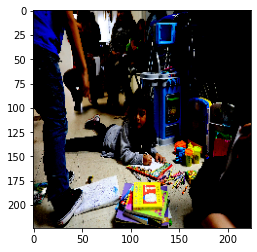

In [63]:
test_image = X_test[3]
pred_mask = cv2.resize(1.0*(model2.predict(x=np.array([test_image]))[0] > 0.2), (Width,Height))

plt.imshow(test_image)

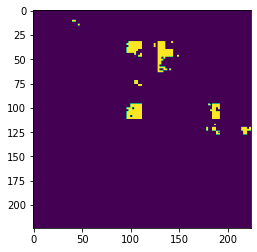

In [64]:
plt.imshow(pred_mask, alpha=1)

___